In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=a6eef582f9691b8b68e5c0ae03cc20b8350ad39a11e1653d63177b53e8a2f964
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

--2025-01-28 08:14:14--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to www.biography.com (www.biography.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-01-28 08:14:14 ERROR 404: Not Found.

--2025-01-28 08:14:14--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 172.64.150.129, 104.18.37.127, 2a04:4e42:2::159
Connecting to pbs.twimg.com (pbs.twimg.com)|172.64.150.129|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-01-28 08:14:14 ERROR 404: Not Found.

--2025-01-28 08:14:14--  https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg
Resolving www.biography.com (www.biography.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Co

In [ ]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg



--2025-01-28 08:14:14--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.03s   

2025-01-28 08:14:15 (83.5 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2025-01-28 08:14:15--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v2/resize:fit:1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg [following]
--2025-01-28 08:14:16--  https://cdn-image

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Unable to read image at {path}")
        return None
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    print("Processing known file:", file)
    img = read_img(os.path.join(known_dir, file))
    if img is not None:
        img_enc = face_recognition.face_encodings(img)[0]
        known_encodings.append(img_enc)
        known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing unknown file:", file)
    img = read_img(os.path.join(unknown_dir, file))
    if img is not None:
        img_enc = face_recognition.face_encodings(img)[0]
        results = face_recognition.compare_faces(known_encodings, img_enc)

        for i in range(len(results)):
            if results[i]:
                name = known_names[i]
                (top, right, bottom, left) = face_recognition.face_locations(img)[0]
                cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
                cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
                cv2_imshow(img)

Processing known file: bill.jpg
Error: Unable to read image at known/bill.jpg
Processing known file: obama.jpg
Error: Unable to read image at known/obama.jpg
Processing known file: elon.jpg
Error: Unable to read image at known/elon.jpg
Processing unknown file: 2.jpg
Processing unknown file: 1.jpg
Processing unknown file: 3.jpg
Processing unknown file: 4.jpg


Processing known file: bill.jpg
Error: Unable to read image at known/bill.jpg
Processing known file: obama.jpg
Error: Unable to read image at known/obama.jpg
Processing known file: elon.jpg
Error: Unable to read image at known/elon.jpg
Processing unknown file: 2.jpg
Results for 2.jpg: []


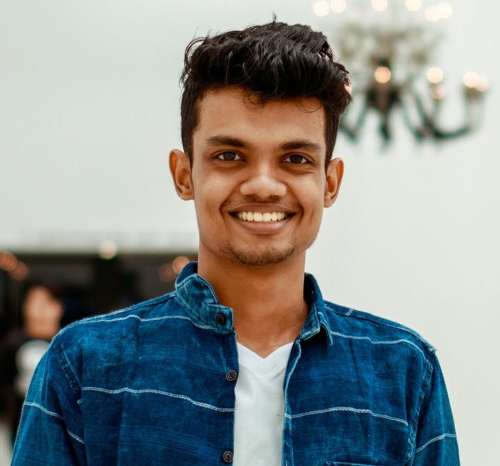

Processing unknown file: 1.jpg
Results for 1.jpg: []


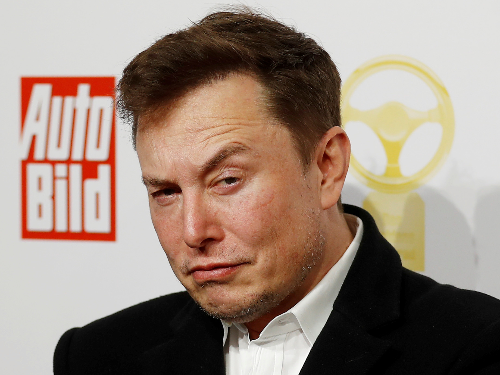

Processing unknown file: 3.jpg
Results for 3.jpg: []


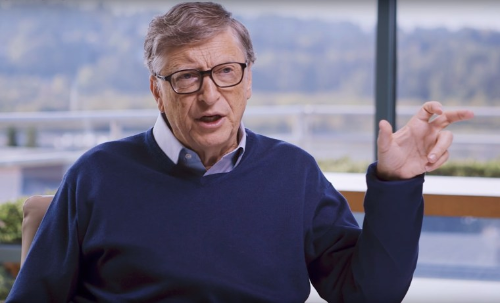

Processing unknown file: 4.jpg
Results for 4.jpg: []


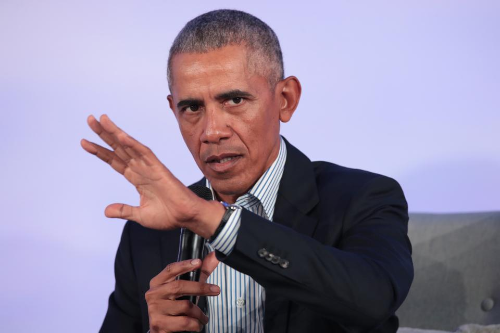

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Unable to read image at {path}")
        return None
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

# Process known images
for file in os.listdir(known_dir):
    print("Processing known file:", file)
    img = read_img(os.path.join(known_dir, file))
    if img is not None:
        img_encodings = face_recognition.face_encodings(img)
        if img_encodings:
            img_enc = img_encodings[0]
            known_encodings.append(img_enc)
            known_names.append(file.split('.')[0])
            print(f"Added encoding for {file.split('.')[0]}")
        else:
            print(f"No face found in {file}")

unknown_dir = 'unknown'

# Process unknown images
for file in os.listdir(unknown_dir):
    print("Processing unknown file:", file)
    img = read_img(os.path.join(unknown_dir, file))
    if img is not None:
        img_encodings = face_recognition.face_encodings(img)
        if img_encodings:
            img_enc = img_encodings[0]
            results = face_recognition.compare_faces(known_encodings, img_enc)
            print(f"Results for {file}: {results}")

            # Draw rectangles and labels for recognized faces
            for i in range(len(results)):
                if results[i]:
                    name = known_names[i]
                    (top, right, bottom, left) = face_recognition.face_locations(img)[0]
                    cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
                    cv2.putText(img, name, (left + 2, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
                    print(f"Recognized {name} in {file}")
            cv2_imshow(img)
        else:
            print(f"No face found in {file}")